In [101]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from scikitplot.plotters import plot_learning_curve
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from ml_metrics import rmsle

In [2]:
pd.set_option('display.max_column', None)

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Load data

In [4]:
data_frame = pd.read_csv('train.csv')

In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
data_frame.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,1452,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,864,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,NaN

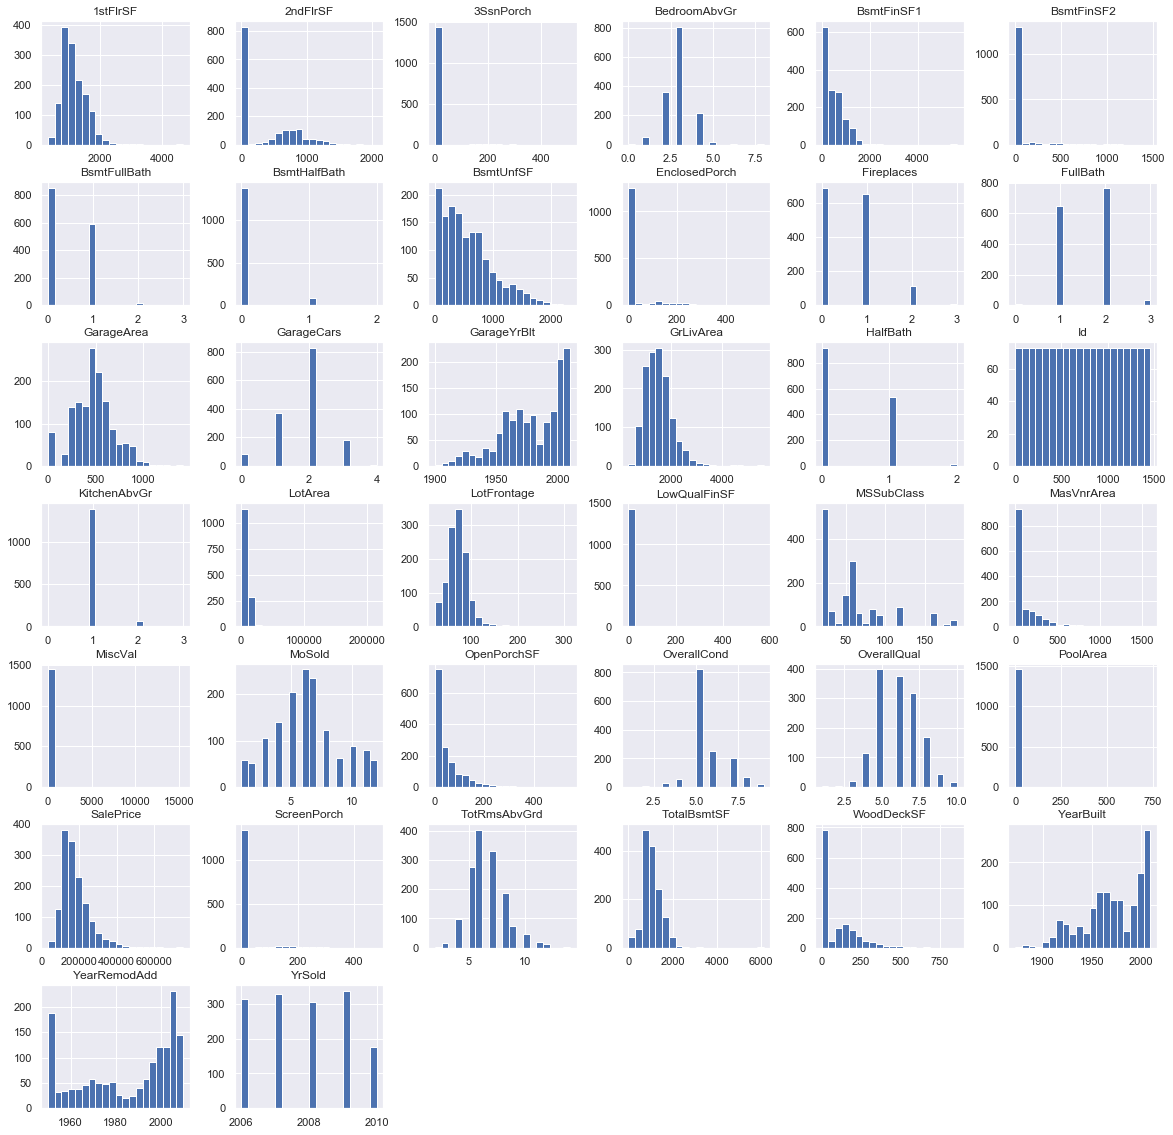

In [7]:
data_frame.hist(figsize=(20, 20), bins=20);

### Prepare data


In [8]:
data_frame.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In PoolQC, MiscFeature, Alley, Fence most of data is missing. We can drop all these columns, but in this way we can miss sth important. Because conform to describe data in feature as PoolQC, Fecne, FireplaceQC "NaN" means 'No pool', 'No fence' and etc. So, for record where pool or fence are available it can effect on price. Therefore I will replace Nan on NA.

In [9]:
data_frame['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [10]:
data_frame['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [11]:
data_frame['MiscFeature'].value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [12]:
cleaned_data = data_frame.copy()

In [13]:
cleaned_data[['MiscFeature', 'PoolQC', 'Alley', 'Fence', 
              'FireplaceQu']] = data_frame[['MiscFeature', 'PoolQC', 'Alley', 'Fence', 'FireplaceQu']].fillna('NA')

In [14]:
cleaned_data[cleaned_data['GarageYrBlt'].isnull()][:5]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,RL,65.0,6040,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NA,NA,NA,0,6,2008,WD,AdjLand,82000
48,49,190,RM,33.0,4456,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,736,736,GasA,Gd,Y,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,8,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,102,0,0,0,NA,NA,NA,0,6,2009,New,Partial,113000
78,79,90,RL,72.0,10778,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1768,1768,GasA,TA,N,SBrkr,1768,0,0,1768,0,0,2,0,4,2,TA,8,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NA,NA,NA,0,4,2010,WD,Normal,136500
88,89,50,C (all),105.0,8470,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,TA,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,156,0,0,0,NA,MnPrv,NA,0,10,2009,ConLD,Abnorml,85000
89,90,20,RL,60.0,8070,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588,Unf,0,402,990,GasA,Ex,Y,SBrkr,990,0,0,990,1,0,1,0,3,1,TA,5,Typ,0,NA,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,NA,NA,NA,0,8,2007,WD,Normal,123600


Where 'GarageYrBlt' equals 'NaN', there other empty 'garage' values is empty, as well. Follow descirbe data it means no garage. 

In [15]:
cleaned_data['GarageYrBlt'].fillna(0, inplace=True) #numerical features replace on number
cleaned_data[['GarageType', 'GarageFinish', 'GarageQual', 
              'GarageCond']] = data_frame[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']].fillna('NA')

In [16]:
data_frame[data_frame['BsmtExposure'].isnull()][:5]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.0,10791,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,NaN,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,500,10,2006,WD,Normal,90000
39,40,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand,82000
90,91,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,109900
102,103,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca,118964
156,157,20,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,109500


The same situation as above.

In [17]:
cleaned_data[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
              'BsmtFinType2']] = data_frame[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna('NA')


In [18]:
cleaned_data[cleaned_data['LotFrontage'].isnull()][:5]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NA,NA,Shed,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,NA,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,NA,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,NA,NA,NA,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733,Unf,0,520,1253,GasA,TA,Y,SBrkr,1253,0,0,1253,1,0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1,352,TA,TA,Y,0,213,176,0,0,0,NA,GdWo,NA,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NA,NA,Shed,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,668,204,1060,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1,270,TA,TA,Y,406,90,0,0,0,0,NA,MnPrv,NA,0,5,2010,WD,Normal,154000


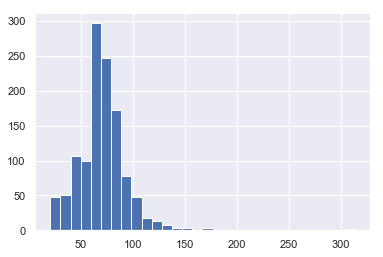

In [19]:
cleaned_data['LotFrontage'].hist(bins=30);

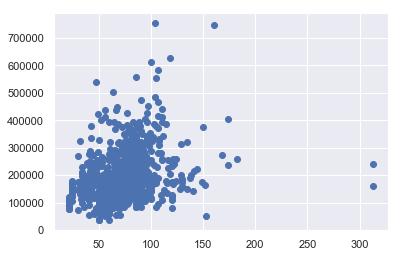

In [20]:
plt.scatter(cleaned_data['LotFrontage'], cleaned_data['SalePrice']);

For "LotFrontage" we have 259 empty records, there are too many to delete. And we can see that there are no values  equal to 0. So we can try to fill these empty values with median (because we have some outliers).

In [21]:
median = cleaned_data['LotFrontage'].median()
cleaned_data['LotFrontage'].fillna(median, inplace=True)

In [22]:
cleaned_data.dropna(inplace=True) #last few empty values we can delete

In [23]:
cleaned_data.isnull().sum().sort_values(ascending=False)

SalePrice       0
Heating         0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
YearRemodAdd    0
YearBuilt       0
OverallCond     0
LandContour     0
MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
Alley           0
LotShape        0
               ..
ScreenPorch     0
PoolArea        0
PoolQC          0
Fence           0
MiscFeature     0
MiscVal         0
MoSold          0
YrSold          0
SaleType        0
GarageCars      0
GarageFinish    0
GarageYrBlt     0
FullBath        0
Electrical      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
HalfBath        0
GarageType      0
BedroomAbvGr    0
KitchenAbvGr    0
KitchenQua

So, now we don't have empty values. <br>
Let's see a little bit closer to our target values 'SalePrice'.

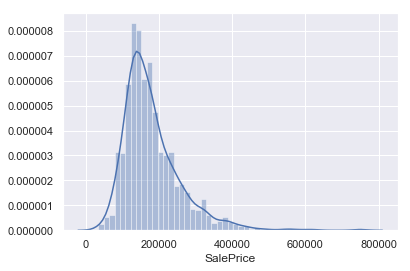

In [24]:
sns.distplot(cleaned_data['SalePrice']);

In [25]:
cleaned_data['SalePrice'].describe()

count      1451.000000
mean     180624.101999
std       79312.128273
min       34900.000000
25%      129900.000000
50%      162500.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [26]:
q = cleaned_data['SalePrice'].quantile(0.99)
q

439390.0

In [27]:
cleaned_data = cleaned_data[cleaned_data['SalePrice'] < q]

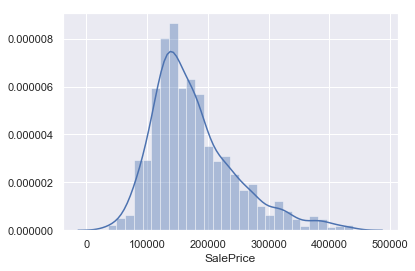

In [28]:
sns.distplot(cleaned_data['SalePrice']);

In [29]:
corr_matrix = cleaned_data.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.798109
GrLivArea        0.680022
GarageCars       0.651798
GarageArea       0.628688
TotalBsmtSF      0.592061
1stFlrSF         0.583653
YearBuilt        0.557174
FullBath         0.556631
YearRemodAdd     0.535463
TotRmsAbvGrd     0.501207
Fireplaces       0.466285
MasVnrArea       0.430340
BsmtFinSF1       0.352353
WoodDeckSF       0.330706
OpenPorchSF      0.315401
LotFrontage      0.313210
2ndFlrSF         0.291316
GarageYrBlt      0.283870
HalfBath         0.276577
LotArea          0.253650
BsmtFullBath     0.235572
BsmtUnfSF        0.219595
BedroomAbvGr     0.173509
ScreenPorch      0.086517
MoSold           0.074296
3SsnPorch        0.058434
PoolArea         0.034949
BsmtFinSF2      -0.008352
MiscVal         -0.019162
BsmtHalfBath    -0.029184
YrSold          -0.032961
Id              -0.035473
LowQualFinSF    -0.060074
OverallCond     -0.074861
MSSubClass      -0.084270
EnclosedPorch   -0.127949
KitchenAbvGr    -0.146095
Name: SalePr

### Outliers

In [30]:
def outliers_plots(x, y='SalePrice', data=cleaned_data):
    "Plot distibuition feature and relationshion between feature and price"
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
    sns.distplot(data[x], ax=ax1)
    sns.scatterplot(data[x], data[y], ax=ax2);

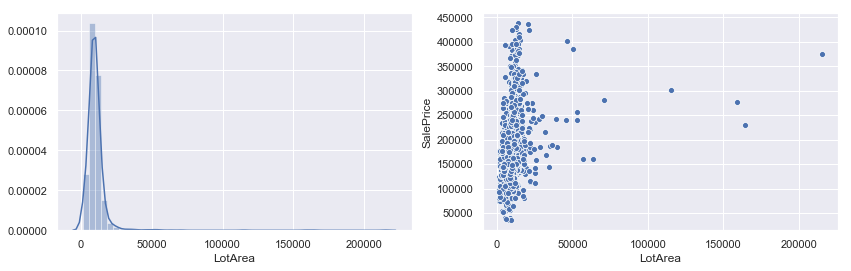

In [31]:
#LotArea
outliers_plots('LotArea')

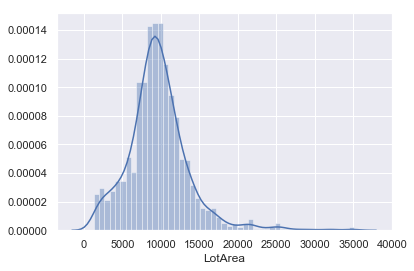

In [32]:
q = np.quantile(cleaned_data['LotArea'], 0.99)
sns.distplot(cleaned_data[cleaned_data['LotArea'] < q]['LotArea']);

In [33]:
cleaned_data = cleaned_data[cleaned_data['LotArea'] < q]

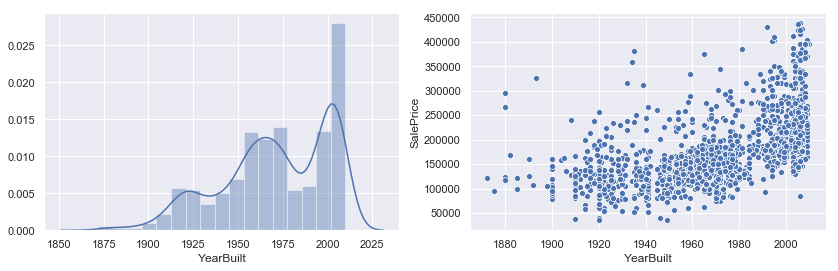

In [34]:
#YearBuilt
outliers_plots('YearBuilt');

In [35]:
q = np.quantile(cleaned_data['YearBuilt'], 0.01)
cleaned_data = cleaned_data[cleaned_data['YearBuilt'] > q]

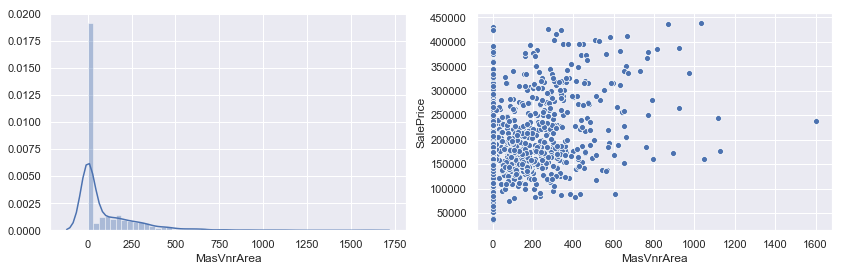

In [36]:
#MasVnrArea
outliers_plots('MasVnrArea')

In [37]:
q = cleaned_data['MasVnrArea'].quantile(0.99)
cleaned_data = cleaned_data[cleaned_data['MasVnrArea'] < q]

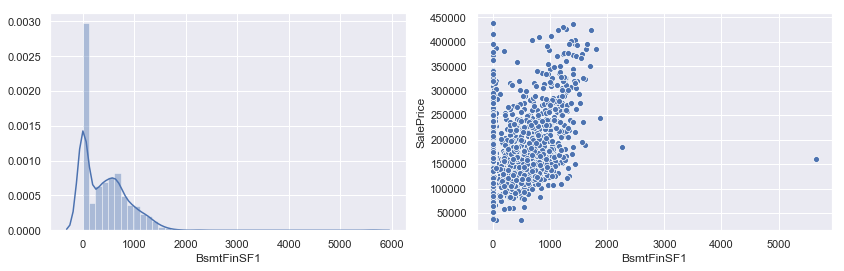

In [38]:
#BsmtFinSF1
outliers_plots('BsmtFinSF1');

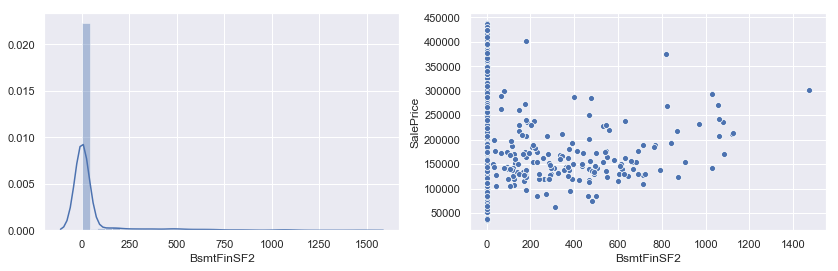

In [39]:
#BsmtFinSF2
outliers_plots('BsmtFinSF2')

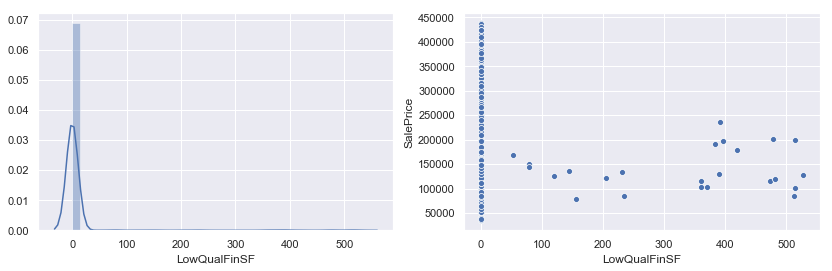

In [40]:
#LowQualFinSF
outliers_plots('LowQualFinSF');

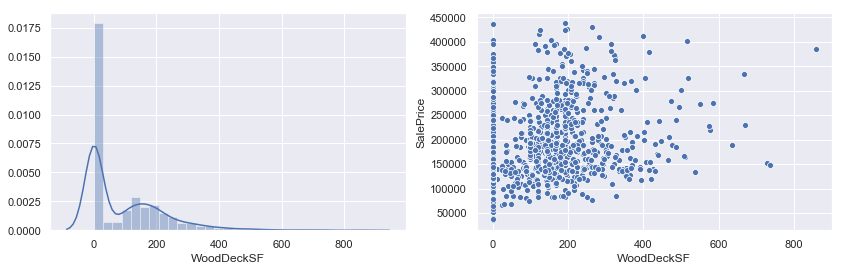

In [41]:
#WoodDeckSF
outliers_plots('WoodDeckSF');

In [42]:
q = np.quantile(cleaned_data['WoodDeckSF'], 0.99)
cleaned_data = cleaned_data[cleaned_data['WoodDeckSF'] < q]

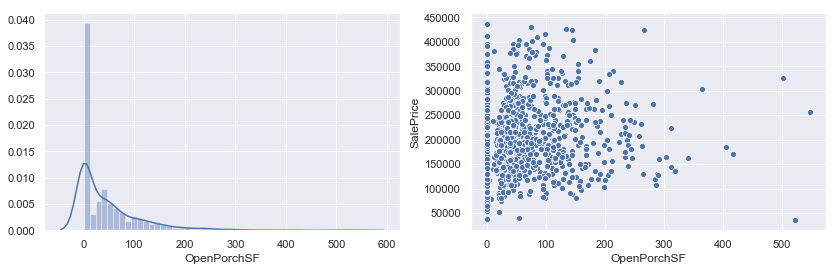

In [43]:
#OpenPorchSF
outliers_plots('OpenPorchSF');

In [44]:
q = np.quantile(cleaned_data['OpenPorchSF'], 0.99)
cleaned_data = cleaned_data[cleaned_data['OpenPorchSF'] < q]

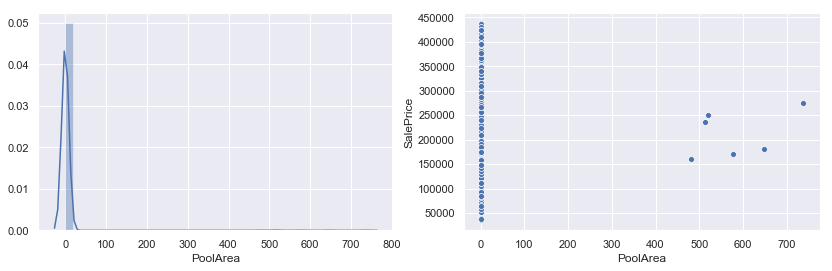

In [45]:
#PoolArea
outliers_plots('PoolArea');

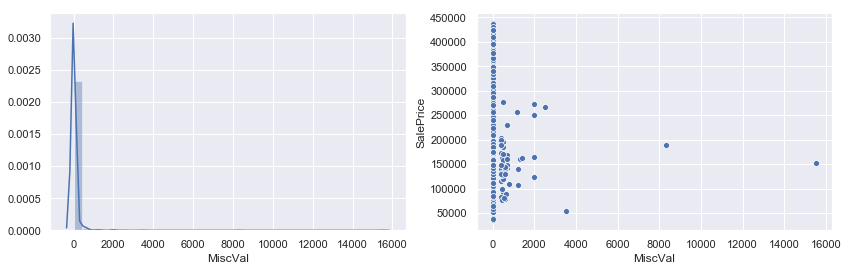

In [46]:
#MiscVal
outliers_plots('MiscVal');

In [47]:
cleaned_data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)

### First model

In [48]:
target = cleaned_data['SalePrice']
log_target = np.log(cleaned_data['SalePrice'])
model_data = cleaned_data.drop(['SalePrice', 'Id'], axis=1) 

In [49]:
#split dataset on train test parts and store test for final testing
train_data, test_data, train_target, test_target = train_test_split(model_data, target, test_size=0.2, random_state=7)

In [76]:
#separate on numerical and categorical features
numeric_features = [x for x in train_data.select_dtypes(include=np.number).columns if x != 'MSSubClass'] #in fact 'MSSubClass' is categorical feature 


X = train_data[numeric_features].values
y = train_target.values

In [75]:
def train_model(model_name, model, X, y, random_state):
    "Function trains model on train part, after checks it on test part and checks by cross validation."
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    model = model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('{0} RMSLE: '.format(model_name), rmsle(y_test, y_pred))

    score = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_log_error')
    cross_score = np.sqrt(-score)
    print('Cross_val_score: ', np.mean(cross_score), cross_score)   
    return model
    

Let's try a few models.

In [52]:
models = {'RandomForest': RandomForestRegressor(),
         'ExtraTrees': ExtraTreesRegressor(),
         'XGB': XGBRegressor(),
         'SVR': SVR(),
         'KNN': KNeighborsRegressor()}

In [77]:
for model_name, model in models.items():
    train_model(model_name, model, X, y, 1)
    print()

RandomForest RMSLE:  0.15674760149478636
Cross_val_score:  0.14671661182395915 [0.14099003 0.16167788 0.14762973 0.1280851  0.15520031]

ExtraTrees RMSLE:  0.1461709038443557
Cross_val_score:  0.14390397843022437 [0.13792254 0.14878261 0.14593442 0.1300734  0.15680692]

XGB RMSLE:  0.13577835720569073
Cross_val_score:  0.1274854303349898 [0.13046197 0.13503075 0.12229219 0.1182882  0.13135405]

SVR RMSLE:  0.37268861802950864
Cross_val_score:  0.37630373566938824 [0.3673784  0.37348938 0.3930569  0.34053193 0.40706207]

KNN RMSLE:  0.20907102465856697
Cross_val_score:  0.2079850399136433 [0.19082815 0.20861344 0.21381657 0.20649952 0.22016751]



So, got the first result. But for most models seem like overfitted.

In [54]:
#scale feature

In [78]:
X_scaled = StandardScaler().fit_transform(X)

In [79]:
for model_name, model in models.items():
    train_model(model_name, model, X_scaled, y, 98)
    print()

RandomForest RMSLE:  0.1556387796036488
Cross_val_score:  0.1476197735846704 [0.1444639  0.1531764  0.1493861  0.12895352 0.16211895]

ExtraTrees RMSLE:  0.14707953655716
Cross_val_score:  0.1429153198180979 [0.1412319  0.15332229 0.13416743 0.13136419 0.15449079]

XGB RMSLE:  0.13354205659612425
Cross_val_score:  0.127484528854933 [0.13047496 0.13503075 0.12229219 0.1182882  0.13133655]

SVR RMSLE:  0.3903456656876765
Cross_val_score:  0.37619775297125657 [0.36728013 0.37336516 0.3929456  0.3404431  0.40695477]

KNN RMSLE:  0.20130973813265404
Cross_val_score:  0.19450254219740606 [0.19201973 0.18773082 0.19865417 0.18032098 0.21378701]



### Categorical data

In [57]:
#generally we have 3 feature types with rate
rates_qual = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
rates_basmtype = {'GLQ': 5, 'ALQ': 4, 'BLQ': 3, 'Rec': 2, 'LwQ': 1, 'Unf': -1, 'NA': 0}
rates_exposure = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': -1, 'NA': 0}

In [58]:
qual = ['GarageCond', 'GarageQual', 'FireplaceQu', 'KitchenQual', 'HeatingQC', 
           'BsmtCond', 'BsmtQual', 'ExterCond', 'ExterQual'] #'PoolQC'
bsmt = ['BsmtFinType2', 'BsmtFinType1']
exposure = ['BsmtExposure']

In [59]:
for x in ((qual, rates_qual),  (bsmt, rates_basmtype), (exposure, rates_exposure)):
    feats, rate = x
    for feat in feats:
        train_data[feat] = train_data[feat].map(rate)

In [80]:
numeric_features = [x for x in train_data.select_dtypes(include=np.number).columns if x != 'MSSubClass'] #in fact 'MSSubClass' is categorical feature 
X = train_data[numeric_features].values

model = XGBRegressor()
t_model = train_model('XGB', model, X, y, 92)

XGB RMSLE:  0.12996428664361534
Cross_val_score:  0.1274854303349898 [0.13046197 0.13503075 0.12229219 0.1182882  0.13135405]


In [61]:
#get dummy
categorical_features = list(train_data.select_dtypes(include=np.object).columns)
categorical_features.append('MSSubClass')

for feat in categorical_features:
    dummies = pd.get_dummies(train_data[feat], prefix='{0}_'.format(feat), drop_first=True)
    train_data = pd.concat([train_data, dummies], axis=1)

In [111]:
#model with dummies
numeric_features = [x for x in train_data.select_dtypes(include=np.number).columns if x != 'MSSubClass'] #in fact 'MSSubClass' is categorical feature 
X = train_data[numeric_features].values

model = XGBRegressor(n_estimators=177, learning_rate=0.1, max_depth=3)
t_model = train_model('XGB', model, X, y, 92)
len(numeric_features)

XGB RMSLE:  0.12651508317989016
Cross_val_score:  0.1248194565236398 [0.12449263 0.13729197 0.11608494 0.12038772 0.12584002]


216

In [82]:
#scaled
X_scaled = StandardScaler().fit_transform(X)

model = XGBRegressor()
t_model = train_model('XGB', model, X_scaled, y, 21)
len(numeric_features)

XGB RMSLE:  0.13117104224362966
Cross_val_score:  0.127484528854933 [0.13047496 0.13503075 0.12229219 0.1182882  0.13133655]


208

### Feature engineering

Let's create some new features and check if it will improve a model.

In [96]:
def check_new_feat(new_feat=None):
    "Fast add new feature and check already exist model with this feature"
    
    if new_feat:
        train_data['New'] = new_feat
    
    numeric_features = [x for x in train_data.select_dtypes(include=np.number).columns if x != 'MSSubClass'] #in fact 'MSSubClass' is categorical feature 
    X = train_data[numeric_features].values
    
    train_model('XGB', model, X, y, 21)
    
    if new_feat:
        train_data.drop('New', axis=1, inplace=True)

In [65]:
check_new_feat(train_data['GarageArea'] / train_data['GarageCars'])

XGB RMSLE:  0.13068134305262152
Cross_val_score:  0.12731782449932594 [0.130654   0.13493694 0.12155035 0.11793064 0.13151719]


In [83]:
#train_data['area_per_car'] = train_data['GarageArea'] / train_data['GarageCars']

In [66]:
check_new_feat(train_data['TotRmsAbvGrd'] / train_data['FullBath'])

XGB RMSLE:  0.13091938877578546
Cross_val_score:  0.1273889057601002 [0.12968747 0.13540463 0.12237194 0.11892722 0.13055327]


In [84]:
#train_data['bath_per_room'] = train_data['TotRmsAbvGrd'] / train_data['FullBath']

In [67]:
check_new_feat(train_data['1stFlrSF'] + train_data['2ndFlrSF'])

XGB RMSLE:  0.1299054324853664
Cross_val_score:  0.12705671515263797 [0.12918676 0.13610038 0.12018764 0.1200841  0.1297247 ]


In [86]:
#train_data['FlrSF'] = train_data['1stFlrSF'] + train_data['2ndFlrSF']

In [68]:
check_new_feat(train_data['BsmtFinSF1'] + train_data['BsmtFinSF2'])

XGB RMSLE:  0.1307482232253742
Cross_val_score:  0.12587003922604528 [0.12824104 0.13410421 0.11839806 0.11801977 0.13058713]


In [88]:
#train_data['BsmtFinSF'] = train_data['BsmtFinSF1'] + train_data['BsmtFinSF2']

In [69]:
check_new_feat(train_data['OverallQual'] + train_data['OverallCond'])

XGB RMSLE:  0.13053214501198757
Cross_val_score:  0.12666122006381095 [0.12963372 0.13724493 0.12052942 0.11530075 0.13059728]


In [90]:
#train_data['Overall'] = train_data['OverallQual'] + train_data['OverallCond']

In [70]:
check_new_feat(train_data['TotRmsAbvGrd'] / train_data['BedroomAbvGr'])

XGB RMSLE:  0.12985165496954815
Cross_val_score:  0.12726020590876025 [0.12913792 0.13555679 0.12142903 0.1192122  0.13096509]


In [92]:
#train_data['bedroom_per_room'] = train_data['TotRmsAbvGrd'] / train_data['BedroomAbvGr']

In [71]:
check_new_feat(train_data['YearRemodAdd'] - train_data['YearBuilt'])

XGB RMSLE:  0.131613003750058
Cross_val_score:  0.12736524108672392 [0.12976163 0.13610143 0.12262826 0.11698084 0.13135405]


In [ ]:
#train_data['last_renovation'] = train_data['YearRemodAdd'] - train_data['YearBuilt']

In [72]:
check_new_feat(train_data['BsmtUnfSF']/train_data['TotalBsmtSF'])

XGB RMSLE:  0.13183113317762649
Cross_val_score:  0.12766694632291126 [0.12789242 0.13677922 0.12215213 0.11886169 0.13264927]


In [97]:
#train_data['part_unf_bsmt'] = train_data['BsmtUnfSF']/train_data['TotalBsmtSF']

In [73]:
check_new_feat(train_data['GrLivArea']/train_data['TotRmsAbvGrd'])

XGB RMSLE:  0.13069581903557032
Cross_val_score:  0.12698365382161111 [0.13050882 0.13355785 0.12027655 0.11873294 0.13184211]


In [99]:
#train_data['area_per_room'] = train_data['GrLivArea']/train_data['TotRmsAbvGrd']

### Optimize model 

In [110]:
parag_grid = {'n_estimators': np.arange(1, 200),
             'learning_rate': np.arange(0, 1, 0.1),
             'max_depth': np.arange(1, 20)}

random_search = RandomizedSearchCV(model, parag_grid, cv=5, scoring='neg_mean_squared_error', n_iter=100)
random_search.fit(X, y)


random_search.best_params_

{'n_estimators': 177, 'max_depth': 3, 'learning_rate': 0.1}

In [74]:
sorted(list(zip(t_model.feature_importances_, numeric_features)))

[(0.0, '3SsnPorch'),
 (0.0, 'BldgType__2fmCon'),
 (0.0, 'BldgType__Duplex'),
 (0.0, 'BldgType__Twnhs'),
 (0.0, 'BldgType__TwnhsE'),
 (0.0, 'BsmtFinSF2'),
 (0.0, 'Condition1__Feedr'),
 (0.0, 'Condition1__PosA'),
 (0.0, 'Condition1__PosN'),
 (0.0, 'Condition1__RRAe'),
 (0.0, 'Condition1__RRAn'),
 (0.0, 'Condition1__RRNe'),
 (0.0, 'Condition1__RRNn'),
 (0.0, 'Condition2__Norm'),
 (0.0, 'Condition2__RRAn'),
 (0.0, 'Condition2__RRNn'),
 (0.0, 'Electrical__FuseF'),
 (0.0, 'Electrical__FuseP'),
 (0.0, 'Electrical__SBrkr'),
 (0.0, 'Exterior1st__AsphShn'),
 (0.0, 'Exterior1st__BrkComm'),
 (0.0, 'Exterior1st__CBlock'),
 (0.0, 'Exterior1st__CemntBd'),
 (0.0, 'Exterior1st__ImStucc'),
 (0.0, 'Exterior1st__Plywood'),
 (0.0, 'Exterior1st__Stone'),
 (0.0, 'Exterior1st__Stucco'),
 (0.0, 'Exterior1st__VinylSd'),
 (0.0, 'Exterior1st__Wd Sdng'),
 (0.0, 'Exterior1st__WdShing'),
 (0.0, 'Exterior2nd__AsphShn'),
 (0.0, 'Exterior2nd__Brk Cmn'),
 (0.0, 'Exterior2nd__BrkFace'),
 (0.0, 'Exterior2nd__CBlock'),
 (0

### Check model on test data